<a href="https://colab.research.google.com/github/msuraj248/DeepLearning/blob/master/DNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [132]:
import pandas as pd
data = pd.read_csv('bank_note_data.csv')
data.head(2)

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


In [133]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [134]:
import tensorflow.compat.v1 as tf

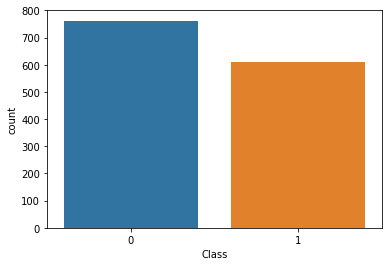

In [58]:
sns.countplot(data=data,x="Class")

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [136]:
x = data.drop("Class",axis=1)
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [137]:
scaled_fea = scaler.fit_transform(x)

In [138]:
df_1=pd.DataFrame(scaled_fea,columns=data.columns[:-1])
df_1.head(2)

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767


In [140]:
X=df_1
y = data['Class']

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
import tensorflow as tf

ImageV = tf.feature_column.numeric_column('Image.Var')
ImageS	 = tf.feature_column.numeric_column('Image.Skew')
ImageC = tf.feature_column.numeric_column('Image.Curt')
Entropy = tf.feature_column.numeric_column('Entropy')

feature_columns = [ImageV,ImageS,ImageC,Entropy]
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[10, 20, 10], n_classes=2)

In [85]:
sess = tf.compat.v1.Session()

In [143]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size = 10,num_epochs=None, shuffle=True)
classifier.train(input_fn= input_func, steps = 200)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpdp53h8xi/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6341359, step = 0
INFO

In [168]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_test, batch_size = 10,num_epochs=1, shuffle=False)
pred = classifier.predict(pred_input_func)
# prediction = list(pred)

In [167]:
while(True):
    try:
        print(next(pred))
    except:
        break